<hr style="border:2px coral solid"></hr>

# Fixed point method and iterative methods for solving linear systems

<hr style="border:2px coral solid"></hr>

Suppose we wanted to solve 

\begin{equation*}
f(x) = b-ax = 0
\end{equation*}

for scalar values $a$, $b$ and $x$.  Furthermore, assume that we cannot easily solve this problem algebraically, because we are not able to easily "divide" $b$ by $a$.  An alternate solution method is to use an *iterative method*.  

### Fixed point iteration
A *fixed point iteration* is an iteration of the form 

\begin{equation}
x_{k+1} = g(x_k), \quad k = 0,1,2,\dots
\end{equation}

where $g(x)$ is some scalar function.  Under certain conditions, this iteration converges and we have

\begin{equation}
\lim_{k \rightarrow \infty} x_k = \overline{x}
\end{equation}

and $\overline{x} = g(\overline{x})$.

To solve $f(x) = 0$ using an iterative scheme, we could seek a function $g(x)$ such that solving $g(x) = x$ is equivalent to solving $f(x) = 0$. 
Then, for an appropriate choice of function $g(x)$, the fixed point iteration will converge to $\overline{x}$, where $f(\overline{x}) = 0$. 


One possible choice of $g(x)$ is 

\begin{equation*}
g(x) \equiv m^{-1}(b-ax) + x = (1-m^{-1}a) x + m^{-1}b
\end{equation*}

for some value of $m$, whose inverse we can "easily" obtain.   The solution to 

\begin{equation*}
g(x) \equiv m^{-1}(b-ax) + x = x
\end{equation*}

is $\overline{x} = b/a$ and so is a solution to $f(x) = 0$. 

If we have chosen $m$ appropriately, we can iteratively obtain this solution using the iteration

\begin{equation}
x_{k+1} = x_k + m^{-1}(b - a x_k). 
\end{equation}

The advantage of this approach is that it doesn't require that we "divide" by $a$ (which might be hard).  We only need to divide by $m$ (which we choose to be easy). 

#### Fixed point algorithm
Starting with an initial guess $x_0$, we have 

    x1 = g(x0)
    x2 = g(x1)
    ...
    
We can stop the iteration when we have either exceeded a prescribed number of iterations, or when we have $|x_k - x_{k+1}| < \tau$ for some tolerance $\tau$. 

    xk = x0
    for k in range(kmax):
        xkp1 = g(xk)
        
        if abs(xkp1 - xk) < tol:
            break
            
        xk = xkp1

### Example
<hr style="border: 1px solid black"></hr>


Solve $f(x) = 5 - 3x = 0$ using the fixed point iteration above, with $m$ set to 5.  

In [1]:
a = 3
b = 5
m = 5

tol =1e-12
xk = 1
for k in range(100):
    xkp1 = xk + (b - a*xk)/m
    err = abs(xkp1 - xk)
    print(f"{k:5d} {xkp1:24.16f} {err:12.4e}")
    if abs(xkp1 - xk) < tol:
        break
    xk = xkp1

print("-"*43)
print(f"xtrue {b/a:24.16f} {0:12.4e}")


    0       1.3999999999999999   4.0000e-01
    1       1.5600000000000001   1.6000e-01
    2       1.6240000000000001   6.4000e-02
    3       1.6496000000000002   2.5600e-02
    4       1.6598400000000002   1.0240e-02
    5       1.6639360000000001   4.0960e-03
    6       1.6655743999999999   1.6384e-03
    7       1.6662297600000000   6.5536e-04
    8       1.6664919040000001   2.6214e-04
    9       1.6665967615999999   1.0486e-04
   10       1.6666387046400000   4.1943e-05
   11       1.6666554818560000   1.6777e-05
   12       1.6666621927423999   6.7109e-06
   13       1.6666648770969601   2.6844e-06
   14       1.6666659508387840   1.0737e-06
   15       1.6666663803355135   4.2950e-07
   16       1.6666665521342054   1.7180e-07
   17       1.6666666208536822   6.8719e-08
   18       1.6666666483414729   2.7488e-08
   19       1.6666666593365893   1.0995e-08
   20       1.6666666637346357   4.3980e-09
   21       1.6666666654938542   1.7592e-09
   22       1.6666666661975416  

In [2]:
# Leave blank

### Choice of value $m$ and convergence

To see how the choice of $m$ affect the convergence of the fixed point method, we rewrite the fixed point method as 

\begin{equation}
x_{k+1} = (1-m^{-1}a)x_k + m^{-1}b
\end{equation}

If we set $\beta = 1-m^{-1}a$, we can write the iteration as

\begin{equation}
x_{k+1} = \beta x_k + (1-\beta)\frac{b}{a}
\end{equation}

Replace $x_k$ with the iteration involving $x_{k-1}$ and so on, we get

\begin{equation}
x_{k+1} =  \beta^2 x_{k-1} + (1-\beta^2) \frac{b}{a} = \dots = 
\beta^{k+1}x_0 + \left(1 - \beta^{k+1}\right) \frac{b}{a}
\end{equation}

it is clear that choosing $|\beta| = |1-m^{-1}a| \ll 1$ will lead to very fast convergence, whereas  $\beta$ values closer to 1 will lead to slower convergence to the solution $\overline{x} = b/a$. 

#### General convergence of fixed point methods

The above condition is equivalent to the more general condition $|\beta| = |g'(x)| < 1$ for 

\begin{equation}
g(x) = \beta x + (1-\beta)\frac{b}{a}
\end{equation}

In [3]:
a = 3
b = 5
beta = 1e-4

tol =1e-12
xk = 0
for k in range(100):
    xkp1 = beta*xk + (1-beta)*b/a
    err = abs(xkp1 - b/a)
    print(f"{k:5d} {xkp1:24.16f} {err:12.4e}")
    if abs(xkp1 - xk) < tol:
        break
    xk = xkp1


    0       1.6665000000000001   1.6667e-04
    1       1.6666666500000000   1.6667e-08
    2       1.6666666666650001   1.6667e-12
    3       1.6666666666666665   2.2204e-16
    4       1.6666666666666667   0.0000e+00


## Graphical interpretation
<hr style="border: 2px solid black"></hr>


Below, we illustrate the scalar fixed point method graphically. 

The slide below can be used to adjust the slope $\beta$ of the fixed point function $g(x) = \beta x + (1-\beta)(b/a)$ for 

\begin{equation}
\beta = 1 - m^{-1}a
\end{equation}

* If $\beta \ll 1$, the function $g(x)$ is very flat and convergence is fast. 

* If $\beta$ is closer to 1, the convergence slows down considerably. 

In [4]:
%matplotlib notebook
from matplotlib.pyplot import *
from numpy import *

from ipywidgets import interactive, fixed
import warnings

<IPython.core.display.Javascript object>


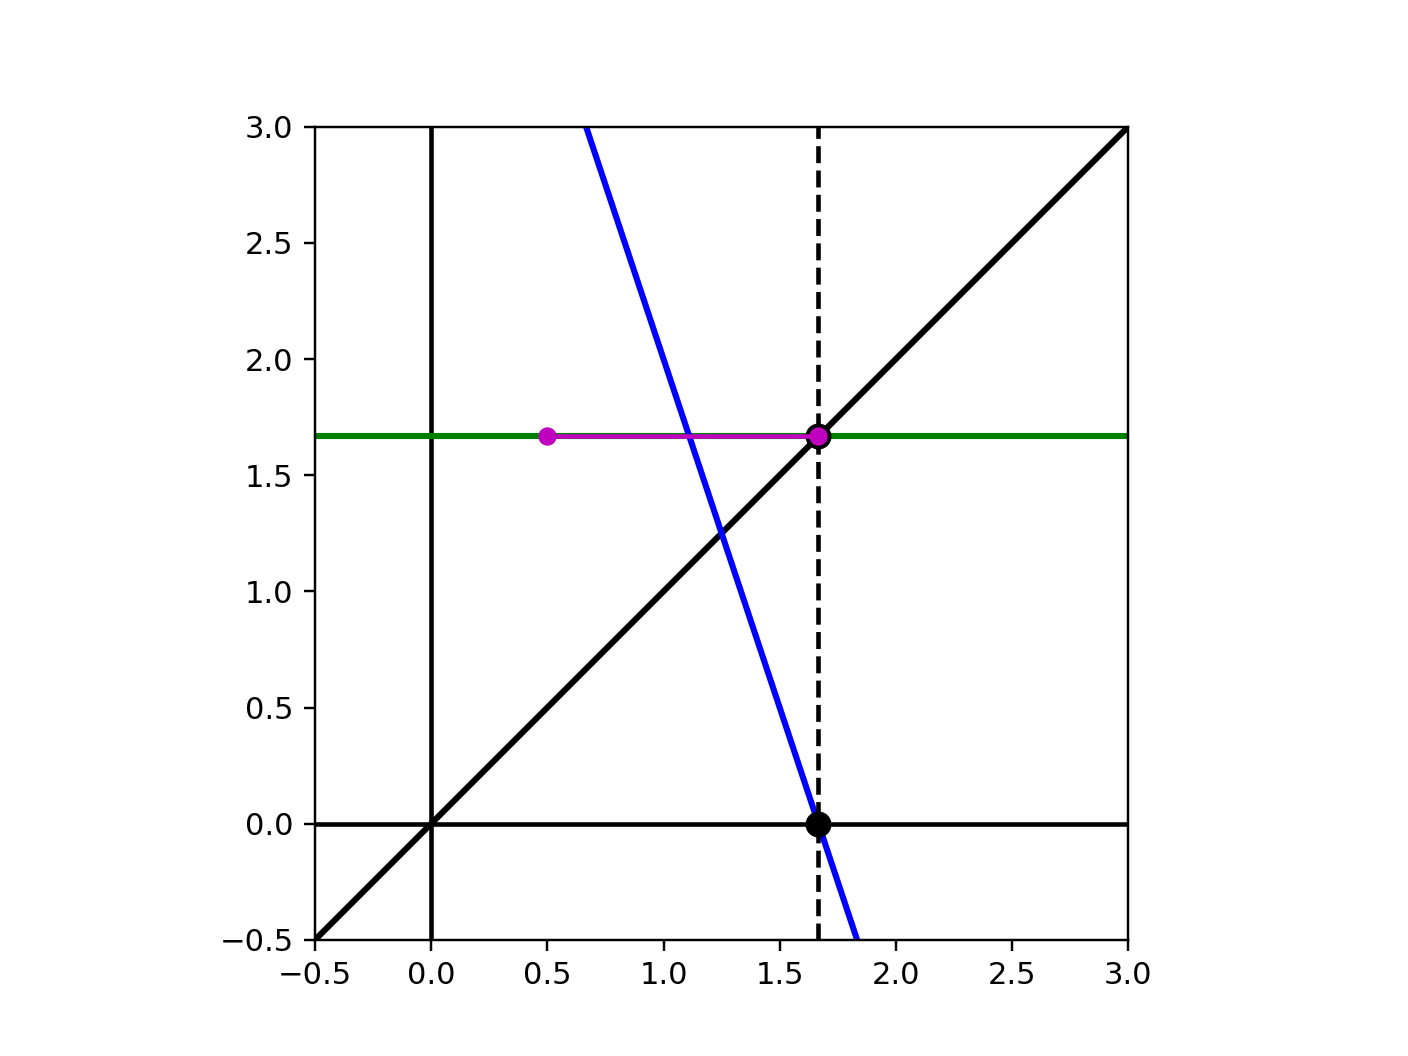

In [5]:
from fp_tools import *

# Define axis limits
xl = array([-.5, 3.])
yl = array([-0.5, 3.])

kmax = 200   # maximum number of fixed point iterations
a = 3       # Define f(x) = 5 - 3x = 0
b = 5

x0 = 0.5    # Initial guess x0

plot_f = True

slider = fixed_point(xl,yl,a,b,kmax,x0,plot_f);

In [6]:
# beta = (1-a/m) = g'(x);  need |g'(x)| < 1
display(slider)   

interactive(children=(FloatSlider(value=0.0, description='alpha', max=2.0, min=-2.0, step=0.04), Output()), _d…

<hr style="border:2px coral solid"></hr>

###  A "Fixed point method" for linear systems

<hr style="border:2px coral solid"></hr>

We will see that this scalar problem can be viewed as an analogue to the linear system

\begin{equation}
F(\mathbf x) = \mathbf b-A\mathbf x
\end{equation}

For the system, the iteration takes the form

\begin{equation}
\mathbf x_{k+1} = \mathbf x_k + M^{-1}\left( \mathbf b - A \mathbf x_k\right)
\end{equation}

for some non-singular matrix $M$.    

Below, we try this out on the linear system 

\begin{equation}
\begin{bmatrix} 5 & 1 \\ -1 & 5
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2
\end{bmatrix} = 
\begin{bmatrix} 1 \\ 1
\end{bmatrix} 
\end{equation}

We set $M = \mbox{diag}(A)$.   The iteration can be written in terms of an intermediate "step" $\mathbf z_k$, where $M \mathbf z_k = \mathbf r_k = \mathbf b - A \mathbf x_k$.   The term $\mathbf b - A \mathbf r_k$ is the *residual*. 

     for k in range(kmax):
         rk = b - A*xk
         zk = solve(M,rk)
         xkp1 = xk + zk
         ...

In [7]:
%reset -f

In [8]:
from numpy import *
from numpy.linalg import solve, norm


In [10]:
from numpy.linalg import solve, norm

A = array([[5,1],[-1,5]])
b = ones((2,1))
M = diag(diag(A))

tol =1e-12
xk = zeros((2,1))
for k in range(100):
    rk = b - A@xk
    zk = solve(M,rk)
    xkp1 = xk + zk
    err = norm(zk,inf)
    print(f"{k:5d} {xkp1[0,0]:24.16f} {xkp1[1,0]:24.16f} {err:12.4e}")
    if err < tol:
        break
    xk = xkp1
    
xtrue = solve(A,b)
print("-"*68)
print(f"xtrue {xtrue[0,0]:24.16f} {xtrue[1,0]:24.16f} {0:12.4e}")


    0       0.2000000000000000       0.2000000000000000   2.0000e-01
    1       0.1600000000000000       0.2400000000000000   4.0000e-02
    2       0.1520000000000000       0.2320000000000000   8.0000e-03
    3       0.1536000000000000       0.2304000000000000   1.6000e-03
    4       0.1539200000000000       0.2307200000000000   3.2000e-04
    5       0.1538560000000000       0.2307840000000000   6.4000e-05
    6       0.1538432000000000       0.2307712000000000   1.2800e-05
    7       0.1538457600000000       0.2307686400000000   2.5600e-06
    8       0.1538462720000000       0.2307691520000000   5.1200e-07
    9       0.1538461696000000       0.2307692544000000   1.0240e-07
   10       0.1538461491200000       0.2307692339200000   2.0480e-08
   11       0.1538461532160000       0.2307692298240000   4.0960e-09
   12       0.1538461540352000       0.2307692306432000   8.1920e-10
   13       0.1538461538713600       0.2307692308070400   1.6384e-10
   14       0.1538461538385920    

In [11]:
# As long as the sum of the diagonal matrix is grater than the sum of the off diagonal of 
#matrix A, the system will converge.

### Convergence

If we write the iteration above as 

\begin{equation}
\mathbf x_{k+1} = (I - M^{-1}A) \mathbf x_k + M^{-1} \mathbf b
\end{equation}

we can show that a sufficient condition for convergence is $\rho\left(I - M^{-1}A\right) < 1$, or 

\begin{equation*}
\mbox{spectral radius : } \quad \max\{|\lambda| : \mbox{where $\lambda$ is an eigenvalue of $I - M^{-1}A$}\} < 1
\end{equation*}

The convergence criteria depends both on the choice of $M$ and the matrix $A$ itself.  

#### Question

* Choosing $M = \mbox{diag}(A)$, under what conditions on $A$ does the above iteration appear to converge? 

<hr style="border:2px coral solid"></hr>

## General splitting methods

<hr style="border:2px coral solid"></hr>



For general $A$, it isn't at all obvious how to choose $M$. Furthermore, since the iteration above involves $M^{-1}$, we want the $M$ to be "easily invertable".   

Some examples of possible matrices include

* $M = A$ 

* $M = \mbox{diag}(A)$

* Some other choice?  

#### Question

Analyze the above choices!


### Implementation of splitting methods

<hr style="border:1px black solid"></hr>


Below, we implement  a general "splitting" method, using the interation 

\begin{equation}
\mathbf x_{k+1} = \mathbf x_k + M^{-1}(\mathbf b - A \mathbf x)
\end{equation}

In practice, we implement the scheme as 

     for k in range(kmax):
         rk = b - A@xk          # residual
         zk = solve(M,rk)      # Compute zk=Minv*rk
         xkp1 = xk + zk
         if norm(zk,inf) < tol:
             break
         xk = xkp1

In [12]:
%reset -f

In [13]:
from numpy import *
from matplotlib.pyplot import *

from numpy.linalg import solve, norm

In [14]:
# General splitting method
def splitting(A,M,F,kmax,tol,prt=False):
    xk = zeros(F.shape)

    e = []  # Store error for plotting later. 
    
    if prt:
        print("Splitting solve")
    for k in range(0,kmax):
        # Compute the residual    
        rk = F - A@xk
    
        # Solve to get Minv*(b - A*x)
        zk = solve(M,rk)
        
        err = norm(zk) 
        if prt:
            print(f"{k:5d} {err:12.4e}")
            
        if err < tol:
            break

        # Update solution
        xkp1 = xk + zk
        
        xk = xkp1
        e.append(err)
        
    return xk,e        

### Two splitting methods
Different choices of $M$ lead to different methods.  If we write

\begin{equation}
A = D + L + U
\end{equation}

where $D = \mbox{diag}(A)$, and $L$ and $U$ are lower an upper triangular portions of the matrix $A$ (not including diagonal terms) respectively, then we have at least two well known methods

* The Jacobi method uses $M = D$

* The Gauss-Seidel method uses $M = L + D$. 

### Example
<hr style="border:1px black solid"></hr>


Below, we use the Jacobi and Gauss-Seidel methods on the tridiagonal matrix

      -2    1    0 ....    0
       1   -2    1   0 ... 0
       0    1   -2   1  .. 0
            .....
       0    .....  1  -2   1
       0    ...... 0   1  -2
       
       


<hr style="border:2px solid black"></hr>

### Jacobi method

For this method, we choose $M$ to be the diagonal of the matrix. 

In [15]:
def jacobi_splitting(A,F,kmax,tol,prt=False):
    M = diag(diag(A))
    
    return splitting(A,M,F,kmax,tol,prt=prt)

In [16]:
N = 8

A = diag(ones(N),-1) + -2*diag(ones(N+1)) + diag(ones(N),1)

kmax = 10000
tol = 1e-12
prt = False

F = ones((N+1,1))

U,E_jacobi = jacobi_splitting(A,F,kmax,tol,prt=prt)

print("Iteration count")
print(f"Jacobi        : {len(E_jacobi):6d}")

Iteration count
Jacobi        :    558


<hr style="border:2px solid black"></hr>

### Gauss-Seidel method

For this method, we choose $M$ to be the lower triangular portion of the matrix. 

In [17]:
def gs_splitting(A,F,kmax,tol,prt=False):
    M = tril(A)  # Includes diagonal
        
    return splitting(A,M,F,kmax,tol,prt=prt)

In [18]:
N = 8

A = diag(ones(N),-1) + -2*diag(ones(N+1)) + diag(ones(N),1)

kmax = 10000
tol = 1e-12
prt = False

F = ones((N+1,1))

U,E_gs = gs_splitting(A,F,kmax,tol,prt=prt)

print("Iteration count")
print(f"Gauss-Seidel        : {len(E_gs):6d}")

Iteration count
Gauss-Seidel        :    286


<IPython.core.display.Javascript object>


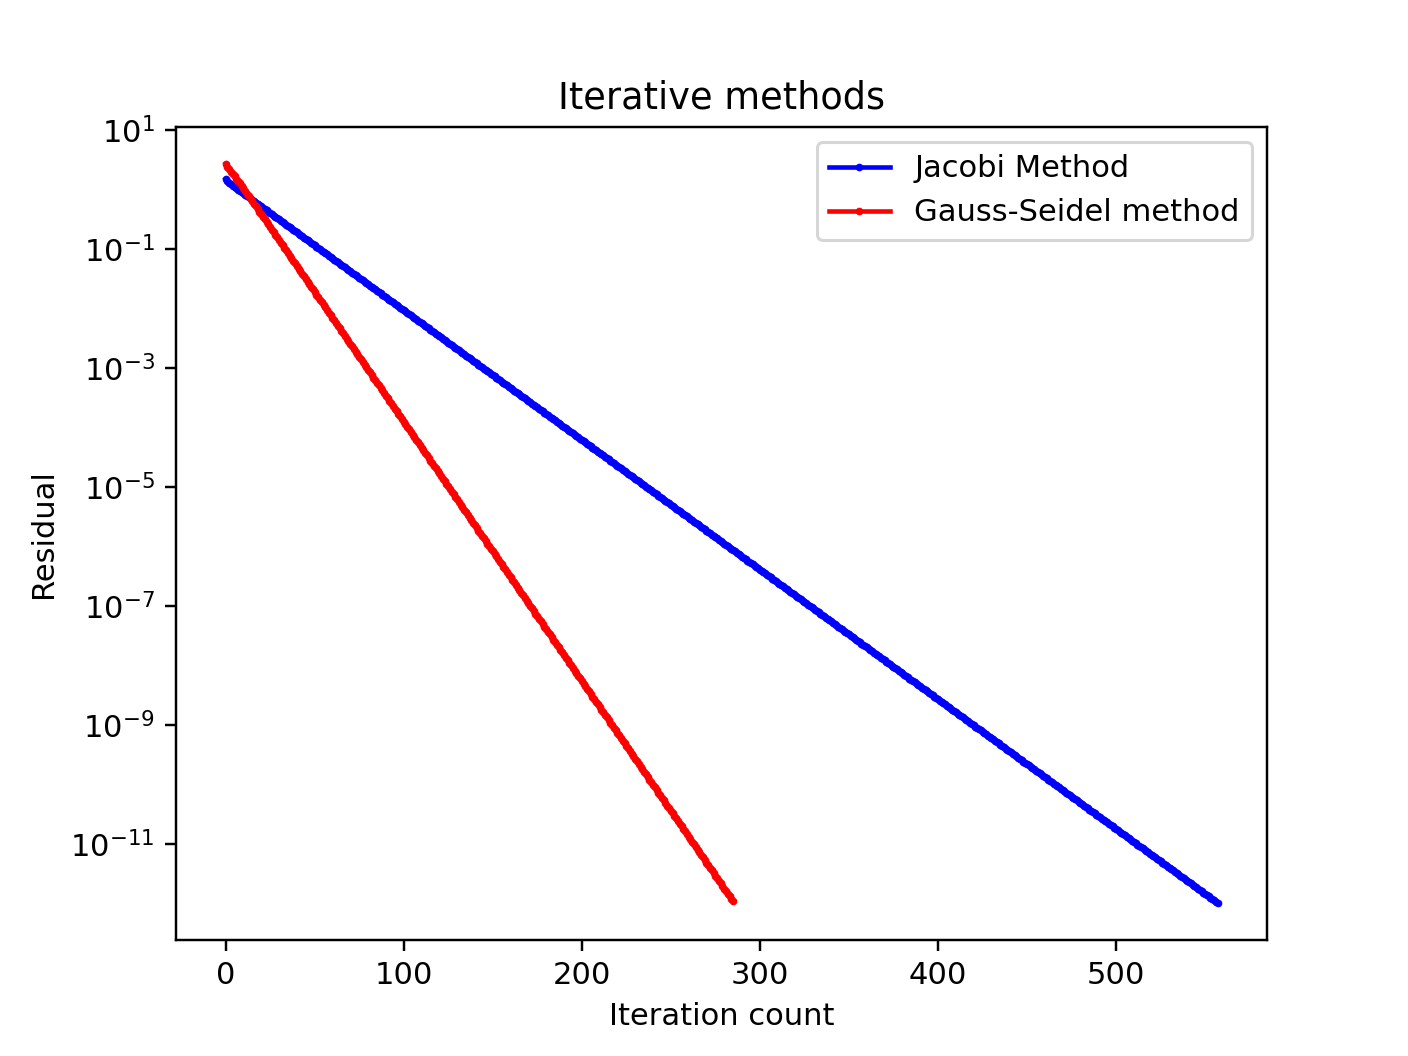

In [19]:
figure(2)
clf()

semilogy(E_jacobi,'b.-',ms=3, label='Jacobi Method')
semilogy(E_gs,'r.-',ms=3, label='Gauss-Seidel method')

title('Iterative methods')
xlabel('Iteration count')
ylabel('Residual')

legend();

### Convergence

Is convergence always guaranteed for the Jacobi method and Gauss-Seidel methods?  No!

* If the matrix is diagonally dominant, than Jacobi converges

* If the matrix is symmetric, positive definite (SPD), than Gauss-Seidel converges. 

As a general rule, Gauss-Seidel converges twice as fast as the Jacobi iteration. 

<hr style="border: 2px coral solid"></hr>

## Matrix-free Jacobi : Version 1

<hr style="border: 2px coral solid"></hr>

When implementing the above iterative methods in parallel, we don't actually form the matrix $A$, but rather we form a "matrix vector" multiply. 

### Jacobi iteration 

It is useful to think of the Jacobi iteration in the following "naive" way.  We write out each equation in the linear system $A\mathbf x = \mathbf b$ as

\begin{equation}
\frac{x_{j-1} - 2 x_j + x_{j+1}}{h^2} = b_j, \qquad j = 0,1,\dots N
\end{equation}

We then add superscripts $k$ and $k+1$ as 

\begin{equation}
\frac{x_{j-1}^k - 2 x_j^{k+1} + x_{j+1}^k}{h^2} = b_j, \qquad j = 0,1,\dots N
\end{equation}
 
and "solve" for $x_{j}^{k+1}$ to get 

\begin{equation}
x_{j}^{k+1} = \frac{x_{j-1}^k + x_{j+1}^k - h^2 b_j}{2}
\end{equation}

Using this, we replace the product `A@x` with a loop

       for j in range(1,N):  
           xkp1[j] = (xk[j-1] + xk[j+1] - h**2*b[j])/2
                         
Entries for $j=0$ or $j=N$ are treated separately.

While this would be slow in Python, it turns out to be a very effective way to solve a linear system in parallel.   

In [20]:
%reset -f

In [21]:
from numpy import *
from numpy.linalg import norm, solve

In [22]:
# Version with A*x replaced by a loop
def jacobi_ver1(F,tol,kmax,prt=False):

    xk = zeros(N+1)
    for k in range(kmax):
    
        # ------------
        # Update xkp1
        # ------------
        xkp1 = zeros(xk.shape)
        xkp1[0] = (xk[1] - h**2*b[0])/2

        for j in range(1,N):
            xkp1[j] = (xk[j-1] + xk[j+1] - h**2*b[j])/2

        xkp1[N] = (xk[N-1] - h**2*b[N])/2
        # ---------------------
        # Done with xkp1 update
        # ---------------------

        err = norm(xk-xkp1,inf)
        if prt:
            print("{:5d} {:12.4e}".format(k,err))

        if err < tol:
            itcount = k
            break;

        xk = xkp1
        
    return xk,itcount
        
        
N = 8
b = ones((N+1,1))

# Jacobi iteration : Version 1
kmax = 1000
prt = False
tol = 1e-12

h = 1/N
F = h**2*b
xk,itcount = jacobi_ver1(F,tol,kmax,prt)


# True solution : Need to form A explicitly. 
A = diag(ones(N),-1) + -2*diag(ones(N+1)) + diag(ones(N),1)
xk_true = solve(A,F)

xk = reshape(xk,(N+1,1))
print("Error : {:12.4e}".format(norm(xk-xk_true,inf)))
print("Iteration count {:d}".format(itcount))

if N < 32:
    print("")
    print("Error x[i]: ")
    print(xk_true - xk)

Error :   1.9991e-11
Iteration count 459

Error x[i]: 
[[-6.17766949e-12]
 [-1.17654358e-11]
 [-1.61733682e-11]
 [-1.90369109e-11]
 [-1.99914252e-11]
 [-1.90369109e-11]
 [-1.61733682e-11]
 [-1.17654358e-11]
 [-6.17766949e-12]]


<hr style="border: 2px coral solid"></hr>

## Matrix free Jacobi : Version 2
<hr style="border: 2px coral solid"></hr>


An alternate approach is to define a `matvec` routine.  This routine returns the result of multiplying a matrix $A$ by a vector $\mathbf x$.  Using this approach, we formulate our Jacobi iteration in terms of a residual as

\begin{equation}
\mathbf x_{k+1} = \mathbf x_k + D^{-1}(\mathbf b - A \mathbf x)
\end{equation}

In [24]:
def apply_laplacian(x):
    L = zeros(x.shape)    
    N = x.shape[0]
    
    L[0] = (-2*x[0] + x[1])/h**2
    for i in range(1,N-1):
        L[i] = (x[i-1] -2*x[i] + x[i+1])/h**2
            
    L[N-1] = (x[N-2] -2*x[N-1])/h**2            
    return L

# Version with A*x replaced by a loop
def jacobi_ver2(apply_laplacian,F,tol,kmax,prt=False):

    xk = zeros(N+1)
    for k in range(kmax):
    
        # ---------------------
        # Update xkp1
        # ---------------------

        # Apply the Laplacian operator
        Ax = apply_laplacian(xk)

        dij = -2/h**2

        xkp1 = zeros(xk.shape)
        for i in range(N+1):
            ri = b[i] - Ax[i]
            xkp1[i] = xk[i] + ri/dij

        # ---------------------
        # Done with xkp1 update
        # ---------------------

        err = norm(xk-xkp1,inf)
        if prt:
            print("{:5d} {:12.4e}".format(k,err))

        if err < tol:
            itcount = k
            break;

        xk = xkp1
        
    return xk,itcount

# Use same parameters as in version 1

# Jacobi iteration : Version 2
xk, itcount = jacobi_ver2(apply_laplacian,F,tol,kmax,prt=False)

# Compute error
xk = reshape(xk,(N+1,1))
print(f"Jacobi required {itcount:d} iterations")
print("Error : {:12.4e}".format(norm(xk-xk_true,inf)))
print("")

print("Error : ")
print(xk_true - xk)

Jacobi required 459 iterations
Error :   1.9991e-11

Error : 
[[-6.17766949e-12]
 [-1.17654358e-11]
 [-1.61733682e-11]
 [-1.90369109e-11]
 [-1.99914252e-11]
 [-1.90369109e-11]
 [-1.61733682e-11]
 [-1.17654358e-11]
 [-6.17766949e-12]]


<hr style="border:solid black 2px"></hr>

### Matrix free : Gauss-Seidel

In [25]:
%reset -f

In [26]:
from numpy import *
from numpy.linalg import solve, norm

In [27]:
# Version with A*x replaced by a loop
def gs_ver1(F,tol,kmax,prt=False):

    xk = zeros(N+1)
    itcount = kmax
    for k in range(kmax):
        
        
        xkp1 = xk.copy()
        # ------------
        # Update xkp1
        # ------------
        xkp1[0] = (xkp1[1] - h**2*b[0])/2

        for j in range(1,N):
            xkp1[j] = (xkp1[j-1] + xkp1[j+1] - h**2*b[j])/2

        xkp1[N] = (xkp1[N-1] - h**2*b[N])/2
        # ---------------------
        # Done with xkp1 update
        # ---------------------

        err = norm(xk-xkp1,inf)
        if prt:
            print(f"{k:5d} {err:12.4e}")

        if err < tol:
            itcount = k
            break;
            
        xk = xkp1

        
    return xk,itcount
        
        
N = 8
b = ones((N+1,1))

# Jacobi iteration : Version 1
kmax = 1000
prt = False
tol = 1e-12

h = 1/N
F = h**2*b
xk,itcount = gs_ver1(F,tol,kmax,prt=False)


# True solution : Need to form A explicitly. 
A = diag(ones(N),-1) + -2*diag(ones(N+1)) + diag(ones(N),1)
xk_true = solve(A,F)

xk = reshape(xk,(N+1,1))
print("Error : {:12.4e}".format(norm(xk-xk_true,inf)))
print("Iteration count {:d}".format(itcount))

if N < 32:
    print("")
    print("Error x[i]: ")
    print(xk_true - xk)

Error :   9.7156e-12
Iteration count 237

Error x[i]: 
[[-3.66964792e-12]
 [-6.63845368e-12]
 [-8.68985439e-12]
 [-9.71558944e-12]
 [-9.71558944e-12]
 [-8.78783157e-12]
 [-7.10947967e-12]
 [-4.91252872e-12]
 [-2.45625742e-12]]


<hr style="border: 2px solid coral"></hr>

## Implementation of iterative methods in parallel 

<hr style="border: 2px solid coral"></hr>

What are the implications of parallel Jacobi?  Gauss-Seidel? 
